### Outlier removing using percentile:


A percentile is a statistical measure that indicates the value below which a certain percentage of data points falls in a set. It essentially divides the ordered data into 100 equal parts. Here's a breakdown of percentiles

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\majhi\AppData\Local\Temp\ipykernel_29640\1870637031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

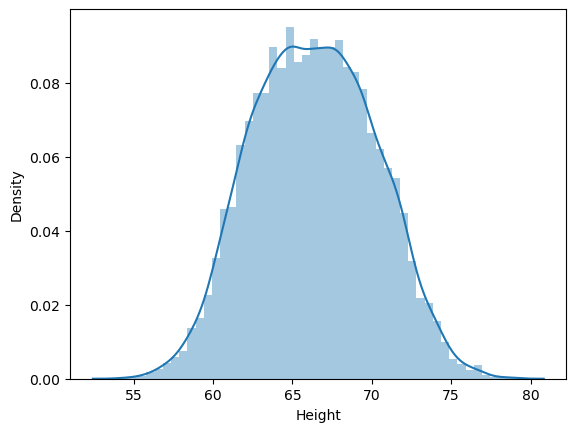

In [6]:
sns.distplot(df["Height"])

<Axes: >

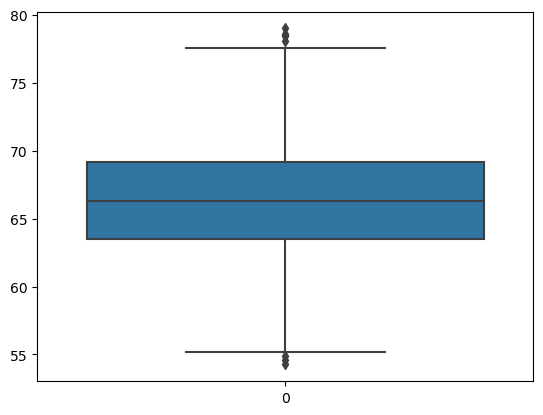

In [8]:
sns.boxplot(df["Height"])

In [10]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [12]:
min_limit=df["Height"].quantile(0.01)
max_limit=df["Height"].quantile(0.99)

In [14]:
min_limit,max_limit

(58.13441158671655, 74.7857900583366)

In [16]:
df[(df["Height"]>max_limit) | (df["Height"]<min_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


#### NOTE: If we have large number of rows, we use capping and if th less number of rows then trimming

### Trimming:

In [18]:
df_new=df[(df["Height"]<max_limit) & (df["Height"]>min_limit)]

In [20]:
df_new

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: >

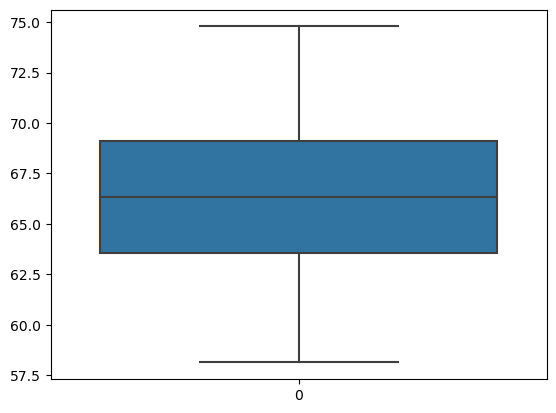

In [22]:
sns.boxplot(df_new["Height"])   #so no outliers

### Capping:

In [24]:
df["Height"]= np.where(df["Height"]>max_limit, max_limit, 
                                     np.where(df["Height"]<min_limit, min_limit, df["Height"]))

In [27]:
df.shape


(10000, 3)

<Axes: >

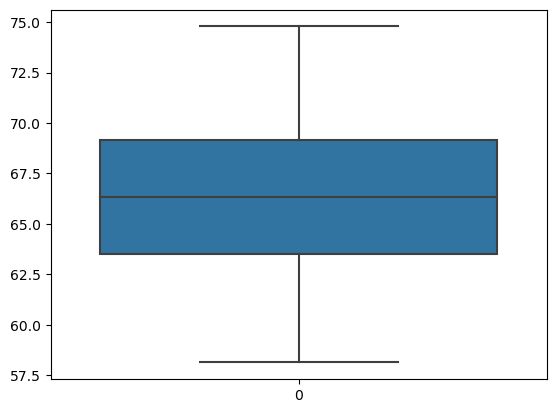

In [29]:
sns.boxplot(df["Height"])